In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

C:\Users\rku68\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x,y=make_moons(n_samples=1000, noise=0.2)

In [3]:
df={'x1':x[:,0],'x2':x[:,1],"y":y}

In [4]:
dataset=pd.DataFrame(df)

In [5]:
dataset.head(3)

,x1,x2,y
0,-0.081261,1.008379,0
1,0.521002,0.770722,0
2,0.054589,0.967282,0


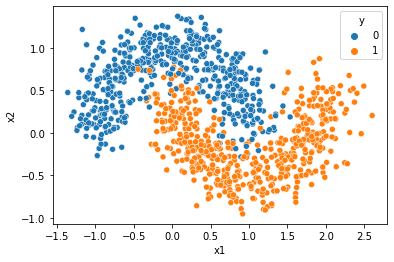

In [6]:
sns.scatterplot( x='x1',y='x2',data=dataset,hue='y')
plt.show()

In [7]:
x_a=dataset.iloc[:,:-1]
y_a=dataset['y']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 93.0)

In [12]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(96.375, 94.5)

In [13]:
gn=GaussianNB()
gn.fit(x_train,y_train)
gn.score(x_train,y_train)*100,gn.score(x_test,y_test)*100

(86.5, 86.5)

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
li=[('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gn1',GaussianNB())]

In [16]:
vc=VotingClassifier(li,weights=[1,2,2])
vc.fit(x_train,y_train)
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.0, 94.5)

In [17]:
pred={'dt':dt.predict(x_test),'sv':sv.predict(x_test),'gn':gn.predict(x_test),'vc':vc.predict(x_test)}

In [49]:
pd.DataFrame(pred)

,dt,sv,gn,vc
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,1,0
...,...,...,...,...
195,1,1,1,1
196,0,0,0,0
197,1,1,1,1
198,1,1,1,1
